In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Business Question: 

### What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [5]:
df_fq = df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True)

df_fq.head(5), proportion_table.head(5)

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

The frequency table gives the count of each zoning type, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories.

## Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\dylan\AppData\Local\Temp\ipykernel_27204\2957152672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_fq.head(5).index, y=df_fq.head(5).values, palette="Set3");


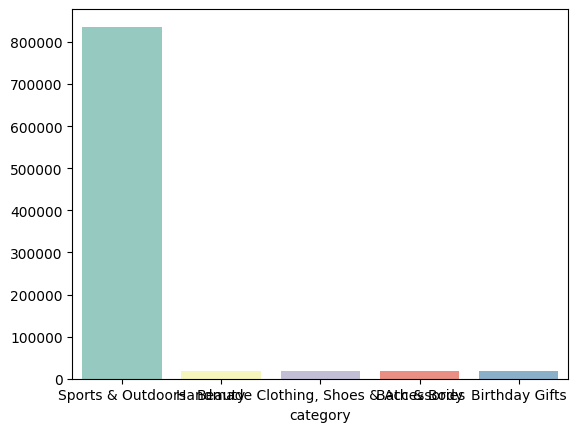

In [8]:
sns.barplot(x=df_fq.head(5).index, y=df_fq.head(5).values, palette="Set3");


Sports and Outdoor dominate the listing  

# **Part 2: Delving into Product Pricing Business Question:**

How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**Measures of Centrality:**

Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed?
- How does this compare with the most common price point (mode)?

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


**From `describe()` we get:**
- Measures of centrality: mean, median (indicated as 50%)
- Measures of dispersion: standard deviation (std), minimum, maximum, quartiles (Q1, Q2, Q3, indicated as 25%, 50%, and 75% respectively)

In [11]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

The average price is $89.24, the most common price is 9.99. There is  difference of 79.75

**Measures of Dispersion:**

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?


**Insights** from Summary Statistics for 'SalePrice':

- The average (mean) price in the dataset is approximately `$89.24`.

- The median sale price (middle value when sorted) stands at `$19.09`. Notably, the median is lower than the mean, suggesting a skew in the distribution of sale prices towards higher values.

- The standard deviation, a measure of the amount of variation or dispersion in the sale prices, is approximately `$345.61`.

- The minimum and maximum sale prices are `$0.0` and `$100,000.0`, respectively, highlighting a wide range of property values in the dataset.

- The inter-quartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `$9.99` and `$45.99`. This means that 50% of the houses in the dataset were sold within this price range.

#### More Centrality and Dispersion Measures


Now, suppose we want to calculate individual statistical measures without using the `.describe()` method. Here are some ways to do it:

- `df[column].mean()`: Computes the mean of the selected column.
- `df[column].median()`: Calculates the median of the selected column.
- `df[column].mode()`: Identifies the mode of the selected column.
- `df[column].std()`: Determines the standard deviation of the selected column.
- `df[column].var()`: Computes the variance of the selected column.
- `df[column].min()`: Finds the minimum value in the selected column.
- `df[column].max()`: Finds the maximum value in the selected column.
- `df[column].count()`: Counts the number of non-NaN entries in the selected column.

In these examples, replace `column` with the name of the column you want to analyze.

In [12]:
df['price'].var()

119445.48532256528

**Visualizations:**

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

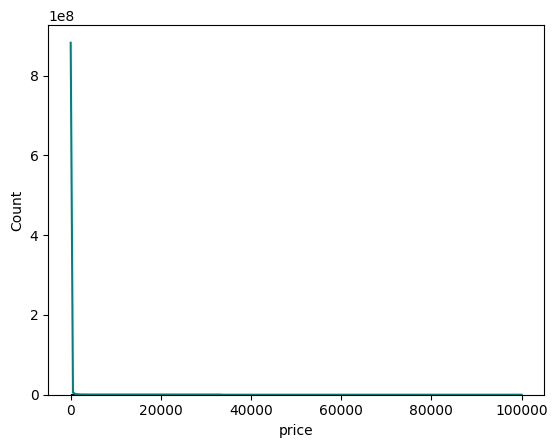

In [18]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df['price'], kde=True, bins=3, color="teal");

From my understanding of the graph there nay not be enough data points in each bin. I have tried decreasing and increasing the amount of bins, either one bar shows over all or its one long low bar that is hard to see.

<Axes: ylabel='price'>

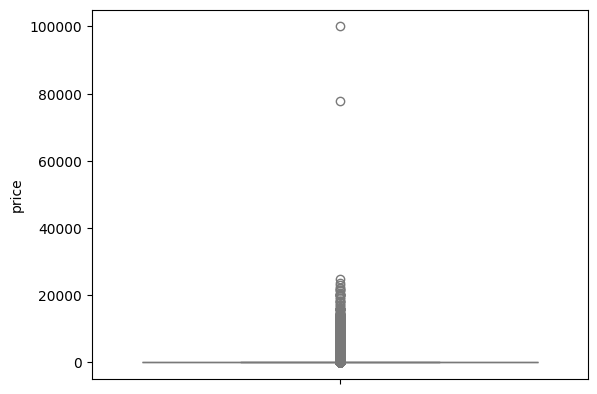

In [19]:
sns.boxplot(data = df['price'], color="lightblue")


right now there are a lot of outliers, I believe they are affecting how the plot is presenting at the moment. 

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [20]:
mean_s = df['stars'].mean()
median_s = df['stars'].median()
mode_s = df['stars'].mode()[0]

mean_s, median_s, mode_s

(2.152836472966065, 0.0, 0.0)

The average rating customers give products is 2.15 stars. its common for most customers not to rate the items they purchase. This should explain why the middle value is zero.

**Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [23]:
df['stars'].var(), df['stars'].std()

(4.81743402976196, 2.1948653785054697)

In [24]:
df['stars'].describe().T

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

- The standard deviation, a measure of the amount of variation or dispersion in STARS is approximately `2.19`

- The inter-quartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `0.000000e+00` and `4.400000e+00`.

There doesn't seem to be a wide range of ratings

**Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [25]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

From the values we can see that the distribution is right-skewed.This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of houses that are sold at higher prices, which are acting as outliers and pulling the mean upwards.

The Kurtisis is negative and less than 3 so the distribtion doeant have a heavy tail or sharp peak. 


**Visualizations:**

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

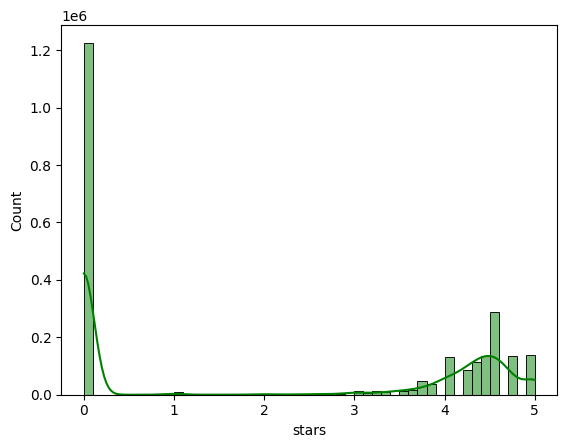

In [30]:
sns.histplot(df['stars'], kde=True, bins=50, color="green");

Rating between 4 and 5 seem to be more common. Not rating an item is very common